In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Data formatted.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.strftime('%d-%m')

In [ ]:
df['date'] = df['date'].dt.month_name()
# No gráfico deve ter o profit total total de cada mês.

total_by_month = df.groupby('date', as_index=False)['profit'].sum()

plt.bar(total_by_month['date'], total_by_month['profit'], width=0.5)
plt.tight_layout()




In [ ]:
# Total de lucro por região.
region_total_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False)

plt.pie(region_total_profit, labels=region_total_profit.index, autopct='%1.0f%%')

In [ ]:
# Total de lucro por canal

# Agrupa os dados
channel_total_profit = df.groupby('channel')['profit'].sum()

# Cria o gráfico
ax = channel_total_profit.plot(kind='bar', color='purple', title='Total profit per channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Profit', rotation=0)
ax.set_xticklabels(channel_total_profit.index, rotation=0)

for i, value in enumerate(channel_total_profit):
    ax.text(i, value + value * 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()



channel
Loja física    0.77%
Online         1.24%
dtype: object


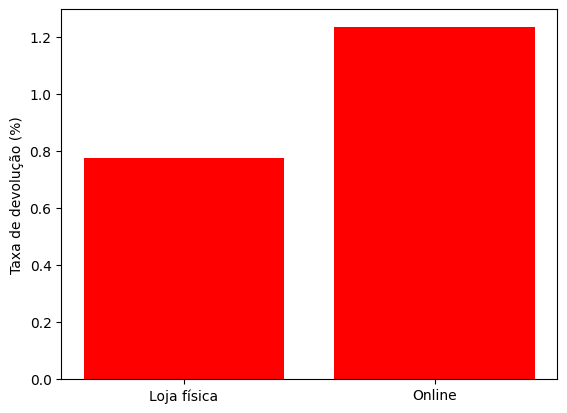

In [92]:
# Taxa de devolução

returned_values = df.query("returned == True").groupby('channel').size()
total_quantity = df.groupby('channel')['quantity'].sum()
return_rate = (returned_values / total_quantity) * 100

#Exibindo no terminal
return_rate_formatted = return_rate.map(lambda x: f'{x:.2f}%')

plt.ylabel('Taxa de devolução (%)')
plt.bar(return_rate_formatted.index, return_rate, color='red')

print(return_rate_formatted)
